In [121]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [189]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [190]:
# features from dataset
x = dataset.iloc[:, :-1]
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [191]:
# target variable
y = dataset["death_event"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death_event, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [127]:
print(x_train)
print(np.array(x_train).shape)
print(np.array(y_train).shape)


      age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
134  81.0        0                      4540  ...    1        1   107
145  50.0        0                       185  ...    1        1   112
63   45.0        0                       582  ...    1        0    61
292  52.0        0                       190  ...    1        1   258
284  50.0        1                        54  ...    1        0   250
..    ...      ...                       ...  ...  ...      ...   ...
251  55.0        0                       572  ...    0        0   215
192  50.0        1                       121  ...    1        0   175
117  85.0        1                       102  ...    0        0    94
47   60.0        0                       582  ...    1        1    40
172  70.0        1                       171  ...    1        1   146

[239 rows x 12 columns]
(239, 12)
(239,)


In [128]:
print(x_test)

        age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
206  40.000        1                       101  ...    0        0   187
188  60.667        1                       151  ...    0        0   172
12   45.000        1                       981  ...    1        0    11
219  55.000        0                       582  ...    0        0   197
237  70.000        0                       232  ...    1        0   210
136  65.000        1                        59  ...    0        0   107
228  65.000        0                        56  ...    0        0   207
205  50.000        1                       167  ...    0        0   187
52   60.000        0                      3964  ...    0        0    43
108  63.000        0                       936  ...    1        1    88
240  70.000        0                        81  ...    0        0   212
15   82.000        1                       379  ...    1        0    13
184  58.000        1                       145  ...    1        

In [129]:
print(y_test)

206    0
188    0
12     1
219    0
237    0
136    0
228    0
205    0
52     1
108    0
240    0
15     1
184    1
246    1
22     1
74     1
269    0
90     0
227    0
255    0
190    0
103    0
124    1
129    0
220    1
116    0
194    1
285    0
294    0
249    0
92     0
66     1
8      1
122    0
217    1
150    1
176    0
182    1
298    0
5      1
263    0
89     0
81     0
34     1
55     1
139    0
234    0
64     0
7      1
45     1
73     0
291    0
173    0
106    0
59     1
230    1
168    0
26     1
283    0
153    0
Name: death_event, dtype: int64


In [193]:
# make feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [131]:
print(x_train)

[[ 1.70455927 -0.89274435  4.04602991 ...  0.73616267  1.46449201
  -0.29449203]
 [-0.92576852 -0.89274435 -0.39339316 ...  0.73616267  1.46449201
  -0.2297298 ]
 [-1.35001494 -0.89274435  0.01130281 ...  0.73616267 -0.68283063
  -0.89030457]
 ...
 [ 2.0439564   1.1201415  -0.47800215 ... -1.35839541 -0.68283063
  -0.46287383]
 [-0.07727569 -0.89274435  0.01130281 ...  0.73616267  1.46449201
  -1.16230595]
 [ 0.77121715  1.1201415  -0.40766456 ...  0.73616267  1.46449201
   0.21065339]]


In [132]:
print(x_test)

[[-1.77426136  1.1201415  -0.47902153 -0.84091787  0.19723428 -0.76340124
  -0.42516583 -0.59870359  0.96163666 -1.35839541 -0.68283063  0.7417037 ]
 [-0.02068121  1.1201415  -0.42805227  1.18917678  0.19723428  1.30992713
  -0.6775321  -0.37986111 -0.12761055 -1.35839541 -0.68283063  0.547417  ]
 [-1.35001494  1.1201415   0.41803755 -0.84091787 -0.68386838 -0.76340124
  -1.33368438 -0.27043986  0.09023889  0.73616267 -0.68283063 -1.5379269 ]
 [-0.5015221  -0.89274435  0.01130281  1.18917678 -0.24331705  1.30992713
   1.03855848 -0.70812483  0.74378721 -1.35839541 -0.68283063  0.87122817]
 [ 0.77121715 -0.89274435 -0.34548205 -0.84091787 -0.68386838 -0.76340124
  -0.96018231 -0.16101862 -0.99900832  0.73616267 -0.68283063  1.03960997]
 [ 0.34697073  1.1201415  -0.52183571  1.18917678  1.95943958 -0.76340124
  -0.97027696 -0.48928235  0.09023889 -1.35839541 -0.68283063 -0.29449203]
 [ 0.34697073 -0.89274435 -0.52489387 -0.84091787 -1.1244197  -0.76340124
  -0.31412468  3.99698858 -1.434

In [133]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
tf.random.set_seed(42)
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 42
learn_rate = [0.001, 0.02]
optimizers = ['rmsprop', 'adam', 'SGD']
batch_size = [10, 20]
epochs = [ 10 , 20 ]
dropout_rate = [0.0, 0.2]
# Make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate,dropout_rate=dropout_rate,batch_size=batch_size, epochs=epochs )
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=KFold(n_splits=10, random_state=1, shuffle=True), verbose=10)

grid_results = grid.fit(x_train, y_train)

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START batch_size=10, dropout_rate=0.0, epochs=10, learn_rate=0.001
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.6744
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.6930
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7070
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7535
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8186
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8465
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8651
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8698
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8744
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8333
[CV 1/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6735 - accuracy: 0.6651
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7116
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7349
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8047
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8186
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8419
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8698
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8605
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8698
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.7917
[CV 2/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7563 - accuracy: 0.4140
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.7581
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8326
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8186
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8279
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8372
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8465
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8512
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8651
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4333 - accuracy: 0.7917
[CV 3/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.6512
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7023
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7023
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7209
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7442
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.7767
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8093
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8512
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8698
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.3988 - accuracy: 0.8333
[CV 4/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6757 - accuracy: 0.6000
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7070
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7209
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7488
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7953
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8279
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8233
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8326
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8279
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.8750
[CV 5/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6142 - accuracy: 0.6651
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.6930
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.6977
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7070
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7070
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7070
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.7302
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8140
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8233
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4212 - accuracy: 0.7917
[CV 6/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6372
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.8326
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8791
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8884
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8884
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8884
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8884
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8791
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8884
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7500
[CV 7/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.6186
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.7209
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7628
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7860
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8279
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8326
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8558
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8651
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8698
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4310 - accuracy: 0.7917
[CV 8/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7073 - accuracy: 0.5209
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7395
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7767
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.8093
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8233
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8419
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8605
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8651
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8698
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8333
[CV 9/10; 1/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.7222
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7593
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8148
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8519
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8657
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8657
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8704
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8750
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8704
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.8696
[CV 10/10; 1/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7349
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8605
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8326
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8930
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9023
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8791
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.8930
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9209
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9023
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.9014 - accuracy: 0.7500
[CV 1/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.6837
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8326
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8279
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8419
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8698
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8791
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8698
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8884
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8884
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7917
[CV 2/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5293 - accuracy: 0.7209
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8465
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8465
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8605
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8884
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8791
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.8884
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8837
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.8930
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 1.0909 - accuracy: 0.7917
[CV 3/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.4882 - accuracy: 0.7581
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8465
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8372
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8465
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.8744
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8698
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8698
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.8837
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.8977
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.7500
[CV 4/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5702 - accuracy: 0.7163
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8419
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8419
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8558
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8558
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8651
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8605
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8279
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8233
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.7500
[CV 5/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7302
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8372
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8372
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8512
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8651
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8698
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8744
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9023
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.8884
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7917
[CV 6/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7628
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8372
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8698
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8884
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8651
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.8977
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.8977
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.8884
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.8977
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 1.8407 - accuracy: 0.6250
[CV 7/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5113 - accuracy: 0.7116
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.7953
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8233
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8651
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8465
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8744
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8465
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8884
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.8884
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.7500
[CV 8/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5686 - accuracy: 0.7023
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8140
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8558
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8698
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8837
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9116
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.8930
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9116
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.8884
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2045 - accuracy: 0.7083
[CV 9/10; 2/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.7639
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8426
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8519
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8704
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8611
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8981
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.8889
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8981
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9028
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.9512 - accuracy: 0.8696
[CV 10/10; 2/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6415 - accuracy: 0.7209
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.8000
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8093
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8512
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8651
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8837
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8837
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8977
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9070
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.8977
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5953
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7767
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.8140
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8233
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8465
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8512
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8744
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8558
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8651
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.7070
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7907
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8140
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8326
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8372
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8558
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8698
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8791
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8791
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6744
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7256
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7860
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8000
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8326
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8419
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8512
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8465
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8558
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8512
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5163
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7488
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7953
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.8140
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8326
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8372
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8419
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8558
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8512
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6433 - accuracy: 0.6651
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.8279
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8372
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8605
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8605
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8651
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8558
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8605
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8651
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8651
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6429 - accuracy: 0.7349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7488
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7674
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7953
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8512
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8791
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8791
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8651
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8791
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6234 - accuracy: 0.7023
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7395
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7860
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8093
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8512
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8512
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8698
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8837
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7628
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8093
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8279
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8558
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8512
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8512
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8791
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8791
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.5926
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7824
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8241
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8333
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8519
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8565
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8657
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8843
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8796
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8611
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.7349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8512
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8419
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8884
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.8884
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8791
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9070
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9023
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8837
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8140
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8419
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8512
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8651
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2528 - accuracy: 0.8698
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8558
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.8744
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8698
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8512
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5116 - accuracy: 0.7721
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8419
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8744
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8419
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8884
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8558
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.8977
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8744
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9209
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5082 - accuracy: 0.7488
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8326
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8605
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8651
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8884
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8930
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.8884
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9023
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9023
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.8977
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7302
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8047
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8326
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8419
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8326
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8744
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8698
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8465
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8744
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7488
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8372
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8651
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8698
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8930
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8512
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8698
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.8930
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9070
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.8977
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.4876 - accuracy: 0.7349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8419
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8419
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8837
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.8651
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8884
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9023
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9023
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.8837
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9209
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7023
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8093
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8558
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8326
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8698
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8698
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8651
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8791
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8698
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8698
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.7442
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8093
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8512
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8837
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8791
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.8977
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8837
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9070
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8605
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9070
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.7824
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8333
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8426
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8657
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8472
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8750
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9074
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.8889
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9120
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.8981
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5814
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.6930
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7674
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8000
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8233
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8000
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8465
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8465
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8605
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8333
[CV 1/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7091 - accuracy: 0.5116
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6651
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7628
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7953
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8372
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7953
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8279
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8465
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8419
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4192 - accuracy: 0.7917
[CV 2/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6518 - accuracy: 0.6791
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7302
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7767
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7721
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7860
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7814
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8372
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8093
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8465
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.7917
[CV 3/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7349
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7767
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7814
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7953
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8279
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8419
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8372
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8279
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8333
[CV 4/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.6419
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6977
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7163
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7442
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7674
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7767
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8140
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8186
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8186
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2646 - accuracy: 0.8750
[CV 5/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7367 - accuracy: 0.4465
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6977
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7628
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.8000
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7674
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7907
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.8093
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.8186
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8186
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 0.4352 - accuracy: 0.8333
[CV 6/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.6605
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7023
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7721
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8093
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8186
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8372
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8744
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8651
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8651
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.7083
[CV 7/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 3ms/step - loss: 0.6552 - accuracy: 0.6651
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7116
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7395
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7395
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7721
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7814
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7907
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8233
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8419
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7083
[CV 8/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.4977
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.7535
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7860
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.8093
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8000
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8419
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8326
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8372
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8558
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8333
[CV 9/10; 5/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6401 - accuracy: 0.6898
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7037
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7176
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7269
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7269
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8009
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8148
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7963
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8102
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 0.4391 - accuracy: 0.8261
[CV 10/10; 5/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.7256
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7953
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.7767
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8465
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8465
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8605
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.8744
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8884
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8651
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1012 - accuracy: 0.6250
[CV 1/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5656 - accuracy: 0.6744
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8000
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8140
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8558
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8419
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8372
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8558
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8512
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8791
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.9412 - accuracy: 0.7500
[CV 2/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7535
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8465
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8326
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8512
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.7953
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8465
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8651
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8698
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8605
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8333
[CV 3/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.4853 - accuracy: 0.7488
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7721
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8093
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8140
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8186
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8279
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8465
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8279
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8465
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7500
[CV 4/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.7256
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8093
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8233
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8047
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8465
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8465
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8605
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8605
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8047
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3376 - accuracy: 0.8750
[CV 5/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5694 - accuracy: 0.7023
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7907
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8233
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8186
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8465
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8512
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8558
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8419
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8605
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7500
[CV 6/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7395
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8372
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8186
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8047
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8651
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8465
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8651
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8698
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8465
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 1.8316 - accuracy: 0.7083
[CV 7/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.6791
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8140
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.8000
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8512
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8372
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8651
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8326
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8512
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8837
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.8851 - accuracy: 0.6667
[CV 8/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5178 - accuracy: 0.7535
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.8186
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8419
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8372
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8465
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8279
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8605
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8651
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8791
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6302 - accuracy: 0.7500
[CV 9/10; 6/16] END batch_size=1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7176
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8102
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8194
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8704
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8472
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8611
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8426
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8611
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8611
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2117 - accuracy: 0.8696
[CV 10/10; 6/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7202 - accuracy: 0.4512
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7395
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7116
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7442
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7721
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8279
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8140
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8465
Epoch 9/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8372
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8465
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.6279
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7163
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7535
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7953
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8047
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8233
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8233
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8419
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.7953
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5767
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7163
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7488
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7860
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7674
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8047
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8047
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8233
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8326
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8512
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6818 - accuracy: 0.6233
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7767
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7535
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7860
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8047
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8372
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8372
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8000
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8419
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8419
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6126 - accuracy: 0.7302
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7721
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7814
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8140
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8140
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8140
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8233
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8512
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8326
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8186
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.6744
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7023
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7395
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7395
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7907
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8093
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8000
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8093
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8326
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.7815 - accuracy: 0.4279
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6186
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7581
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7349
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7953
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.8372
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8279
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8326
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8698
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8605
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.6233
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7209
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7302
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7302
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7674
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7860
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8186
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8279
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8279
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.5163
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6930
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7349
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8000
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7488
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8186
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8279
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8279
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8279
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8326
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6576 - accuracy: 0.6759
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7037
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7269
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7639
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7778
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7593
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8056
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8102
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8241
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8009
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.6884
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7628
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.7767
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.7860
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8326
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8093
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8233
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8419
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8326
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8372
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6100 - accuracy: 0.6837
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7953
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8233
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8186
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8279
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8419
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8326
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8651
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8558
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8419
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6791
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8140
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8558
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8465
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8651
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8512
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8465
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8512
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8744
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8326
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.7163
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7442
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.7860
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8140
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8372
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8279
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8372
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8651
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8465
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.6020 - accuracy: 0.7209
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7442
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7767
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8372
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8465
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8000
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8419
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8233
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8000
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8186
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.7349
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8233
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8372
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8279
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8419
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8651
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8744
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8651
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8791
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.7116
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8326
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8744
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8512
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.8465
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8419
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8744
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8698
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8791
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7488
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8279
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8000
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8186
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8372
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8372
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8140
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8465
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8419
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8558
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7209
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8093
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8186
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8558
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8558
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8465
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8651
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8698
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8512
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8791
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 1s 2ms/step - loss: 0.5073 - accuracy: 0.7407
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8102
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8333
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8148
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8611
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8519
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8565
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8704
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8472
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8750
Epoch 11/20
22/22 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.4558
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6791
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.7674
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.8279
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.8465
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.8419
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8558
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8605
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8558
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.4852 - accuracy: 0.7917
[CV 1/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7287 - accuracy: 0.4558
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6326
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.7395
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7860
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7907
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7953
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7953
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8279
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8465
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7500
[CV 2/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6605
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6118 - accuracy: 0.7256
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7163
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7395
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7628
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.8000
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8093
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8326
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8558
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5064 - accuracy: 0.7083
[CV 3/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6837
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.7163
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7302
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7349
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7535
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7860
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7860
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8140
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8233
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.4463 - accuracy: 0.7917
[CV 4/10; 9/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7369 - accuracy: 0.4419
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6884
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7674
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.8279
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.8419
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.8465
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.8419
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.8465
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8512
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 0.4138 - accuracy: 0.8333
[CV 5/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.5860
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.7535
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7907
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8093
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8233
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8512
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8558
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8558
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8558
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8750
[CV 6/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7439 - accuracy: 0.3116
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.4884
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.7209
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.8093
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.8047
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.8000
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.8233
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.8372
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.8512
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7060 - accuracy: 0.5000
[CV 7/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6747 - accuracy: 0.6279
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7256
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7349
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7349
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7581
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8093
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8186
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8233
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8326
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7083
[CV 8/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6837
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7070
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7163
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7349
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7767
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8093
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8326
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8465
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8744
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8333
[CV 9/10; 9/16] END batch_size=2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5278
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7593
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.8194
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8333
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8333
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8472
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8704
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8565
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8565
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4189 - accuracy: 0.8696
[CV 10/10; 9/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7721
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8279
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8837
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.8884
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9163
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9163
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.8837
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9070
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9442
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 1.1819 - accuracy: 0.6250
[CV 1/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7395
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8512
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8558
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.8465
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2682 - accuracy: 0.8791
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.8837
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.8884
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9116
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9395
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6978 - accuracy: 0.6667
[CV 2/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7256
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8419
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8698
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8651
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8977
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9209
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9116
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9209
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9349
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.9177 - accuracy: 0.8333
[CV 3/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7535
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8465
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8744
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8605
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.8651
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.8930
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9023
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.8930
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9163
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5636 - accuracy: 0.7917
[CV 4/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6262 - accuracy: 0.6744
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8419
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8558
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8605
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.8791
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8884
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.8977
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.8977
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9163
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.4018 - accuracy: 0.8750
[CV 5/10; 10/16] END batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5340 - accuracy: 0.7302
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3864 - accuracy: 0.8093
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3307 - accuracy: 0.8465
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8558
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8744
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.8791
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.8884
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9023
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.8884
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.8906 - accuracy: 0.6667
[CV 6/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.6744
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3544 - accuracy: 0.8605
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.8744
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.8930
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.8698
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.8977
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9070
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1534 - accuracy: 0.9070
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9163
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 2.1484 - accuracy: 0.5833
[CV 7/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.6977
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.7814
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8186
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8605
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8791
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.8837
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.8884
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.8930
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.8744
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7990 - accuracy: 0.7500
[CV 8/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5049 - accuracy: 0.7116
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8326
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8605
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.8698
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.8930
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9302
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9256
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.9163
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9256
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 1.1706 - accuracy: 0.7500
[CV 9/10; 10/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.7407
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8380
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8472
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8796
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.8472
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.8889
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.8889
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9074
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9259
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.8883 - accuracy: 0.8696
[CV 10/10; 10/16] END batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7563 - accuracy: 0.3721
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7209
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7953
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5234 - accuracy: 0.8047
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8186
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8326
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8512
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8651
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8698
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8558
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6977
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.6977
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.6977
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.6977
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.6977
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.7535
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.7721
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.7814
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8000
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8047
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.6233
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7302
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7860
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8000
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8233
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8372
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8465
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8465
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8558
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8651
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7713 - accuracy: 0.3721
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6930
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7721
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7814
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.8047
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8326
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8419
Epoch 8/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8465
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8465
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8605
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6490 - accuracy: 0.6791
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.6930
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7116
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7395
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7535
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7814
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8140
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8233
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8465
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8558
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6262 - accuracy: 0.6977
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7628
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7860
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8140
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8140
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8419
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8465
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8465
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8512
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8512
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6726 - accuracy: 0.5349
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7070
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7442
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7907
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8465
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8744
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8558
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8558
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8512
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8744
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7361 - accuracy: 0.3395
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6140
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.8372
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.8605
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.8605
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8605
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.8744
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8651
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8698
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8744
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6570 - accuracy: 0.6465
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7163
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7442
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7721
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8047
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8326
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8372
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8512
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8651
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8744
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6447 - accuracy: 0.6574
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7963
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8194
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8333
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8287
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8565
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8611
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8565
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8611
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8611
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5336 - accuracy: 0.7070
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8419
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8605
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8837
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.8791
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9302
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2003 - accuracy: 0.9023
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9395
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9256
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9349
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.5618 - accuracy: 0.6512
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8140
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8419
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8465
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8698
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8651
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.8837
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.9116
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8930
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.8977
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7302
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8558
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8558
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8558
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.8791
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.8930
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.8977
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9163
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9023
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9116
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.7767
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8372
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8512
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8558
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.8791
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.8930
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.8977
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9116
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9070
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9070
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6300 - accuracy: 0.6791
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8047
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8419
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8698
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8558
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.8698
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.8837
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.8791
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.8884
Epoch 10/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9116
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.4987 - accuracy: 0.7442
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8512
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.8512
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8698
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.8791
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.8884
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9256
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9256
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1766 - accuracy: 0.9209
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1612 - accuracy: 0.9302
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.7767
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8512
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8651
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9116
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2121 - accuracy: 0.9070
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9209
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9256
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9349
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9395
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9442
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.7767
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8326
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8558
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 0.8558
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8837
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.8977
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.8977
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9116
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9070
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9488
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7256
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8326
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8698
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8930
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9070
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9395
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9535
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9581
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9628
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9581
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6035 - accuracy: 0.6806
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8380
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8333
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8843
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8796
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8704
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.8796
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9028
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9306
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9259
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.6512
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6930
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7023
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7163
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7395
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7442
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7442
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7721
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.7814
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.8333
[CV 1/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6400 - accuracy: 0.6744
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6977
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7349
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7488
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7535
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7442
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7721
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7721
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8093
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7500
[CV 2/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.6233
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6977
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7349
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7488
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7628
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7953
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.8000
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8047
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8279
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.5220 - accuracy: 0.7083
[CV 3/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.7487 - accuracy: 0.5070
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6279
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.7209
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7023
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7442
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7442
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7767
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7767
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7953
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 0.4511 - accuracy: 0.8333
[CV 4/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7373 - accuracy: 0.3721
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5163
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6884
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.7163
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7907
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.7907
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.8093
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.8093
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8279
Epoch 10/10
2/2 [==============================] - 0s 11ms/step - loss: 0.4846 - accuracy: 0.8750
[CV 5/10; 13/16] END batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7072 - accuracy: 0.5674
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6698
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7349
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.7395
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7581
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7907
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7535
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7628
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.7674
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4148 - accuracy: 0.7917
[CV 6/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.6140
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.7302
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7488
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7814
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7767
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7860
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.7907
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8233
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8093
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6147 - accuracy: 0.7083
[CV 7/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6302 - accuracy: 0.7070
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7116
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7349
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7070
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7395
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7256
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.7628
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7349
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7628
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4772 - accuracy: 0.7083
[CV 8/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6686 - accuracy: 0.6465
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7674
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.7721
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7442
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.8140
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.8000
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8047
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.8326
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8419
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.7917
[CV 9/10; 13/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6749 - accuracy: 0.6343
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6713
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7315
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7407
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7917
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7824
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8056
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8241
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8148
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8696
[CV 10/10; 13/16] END batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6503 - accuracy: 0.7256
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8233
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8279
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8651
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8744
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.9023
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8744
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2864 - accuracy: 0.8558
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9116
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.9165 - accuracy: 0.7500
[CV 1/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.5859 - accuracy: 0.6977
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8093
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8419
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8465
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8651
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8698
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8698
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.8744
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8884
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.5911 - accuracy: 0.7500
[CV 2/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5542 - accuracy: 0.7814
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8512
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8651
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8558
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8744
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8512
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8651
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8698
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8791
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.7715 - accuracy: 0.7500
[CV 3/10; 14/16] END batch_size

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.7209
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8000
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8326
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.8326
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8372
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8605
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.8558
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8512
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8605
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.6250
[CV 4/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6033 - accuracy: 0.6884
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7628
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.7860
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8000
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8093
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8093
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8372
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8558
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8512
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.9167
[CV 5/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5414 - accuracy: 0.7163
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.7907
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.7907
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.7907
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8279
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8419
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8186
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8465
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.8465
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8333
[CV 6/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7488
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8233
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8093
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8605
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8512
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.8558
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.8837
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9023
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.8744
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 1.4794 - accuracy: 0.7083
[CV 7/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5693 - accuracy: 0.6791
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.7860
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.8093
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8465
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8558
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2775 - accuracy: 0.8884
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.8651
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8512
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8465
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.8788 - accuracy: 0.6667
[CV 8/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5893 - accuracy: 0.6698
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8093
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.8326
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8651
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8605
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8512
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8651
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8651
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.8884
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7861 - accuracy: 0.7083
[CV 9/10; 14/16] END batch_size=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5529 - accuracy: 0.6898
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8102
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8426
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8287
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.8194
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8472
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8426
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.8472
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8472
Epoch 10/10
2/2 [==============================] - 0s 11ms/step - loss: 0.8891 - accuracy: 0.8696
[CV 10/10; 14/16] END batch_siz

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6652 - accuracy: 0.6558
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6837
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.6930
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.6930
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.6930
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7209
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7395
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.7581
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7907
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8000
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6488 - accuracy: 0.6512
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6744
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7116
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7581
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7814
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7767
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7814
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8047
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8093
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8419
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7753 - accuracy: 0.4186
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5488
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.7070
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7907
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.8047
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7953
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.8186
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.8186
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.8047
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.8047
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7012 - accuracy: 0.4605
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.7023
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7209
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7814
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7628
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7953
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.8000
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7907
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.8372
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7255 - accuracy: 0.4372
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6000
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6930
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5908 - accuracy: 0.7395
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.7860
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7674
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.7907
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8000
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8140
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8326
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.6465
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.7349
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7488
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7256
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7814
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.7674
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7907
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.7860
Epoch 9/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.7442
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8047
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7342 - accuracy: 0.4093
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.6233
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7163
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.7721
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.8140
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.8140
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.8372
Epoch 8/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.8326
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8326
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8000
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.7146 - accuracy: 0.4233
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6744
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5933 - accuracy: 0.7395
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7767
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7442
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.8000
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7860
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7907
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7907
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8233
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6606 - accuracy: 0.6651
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.7023
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.7023
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7302
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7442
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7907
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7349
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7860
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8093
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8093
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.6523 - accuracy: 0.6528
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5990 - accuracy: 0.6759
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7083
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5211 - accuracy: 0.7269
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7639
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7361
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7731
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7917
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8102
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8102
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5910 - accuracy: 0.6698
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.7535
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8140
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8558
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8651
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.8791
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.8558
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2931 - accuracy: 0.8698
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8233
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.8791
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 2ms/step - loss: 0.6126 - accuracy: 0.6372
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7814
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7721
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8140
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.7814
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8279
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8372
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8605
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8372
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8512
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 4ms/step - loss: 0.6004 - accuracy: 0.7209
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8186
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8372
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8605
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8744
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.8791
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8698
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8651
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.8884
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.8977
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5621 - accuracy: 0.7256
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8279
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8233
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8419
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8651
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8605
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8512
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8791
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.8977
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.8977
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5667 - accuracy: 0.7256
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8186
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8279
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3583 - accuracy: 0.8326
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8558
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8512
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8558
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8512
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8465
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8419
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5593 - accuracy: 0.7442
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8512
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8465
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8372
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8093
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8512
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8605
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8744
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.8884
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.8930
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5423 - accuracy: 0.7070
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8140
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.8279
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8186
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8605
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2581 - accuracy: 0.8930
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.8977
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.8651
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.8930
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2152 - accuracy: 0.9070
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5849 - accuracy: 0.7070
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8279
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8047
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.8093
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8558
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8326
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8419
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8512
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8419
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.8698
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5707 - accuracy: 0.6744
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8279
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8372
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8465
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8744
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.8791
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2762 - accuracy: 0.8744
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8930
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.8977
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9163
Epoch 11/20
11/11 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 3ms/step - loss: 0.5401 - accuracy: 0.6852
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.7685
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8426
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8380
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8519
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8426
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8704
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8750
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8843
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8750
Epoch 11/20
11/11 [===========

In [135]:
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.8161231875419617 (0.03738428754484887) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.001}
0.7577898561954498 (0.060215003831909565) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.02}
0.7952898561954498 (0.07024222193174572) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.001}
0.7701086938381195 (0.04167808954418091) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 20, 'learn_rate': 0.02}
0.8034420192241669 (0.05251280187168519) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 10, 'learn_rate': 0.001}
0.7577898502349854 (0.07782288336932448) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 10, 'learn_rate': 0.02}
0.8036231815814971 (0.04097727227343847) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 20, 'learn_rate': 0.001}
0.7411231815814971 (0.053974864805525706) with: {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 20, 'learn_rate': 0.02}
0.7661231815814972 (0.1051

In [136]:
best_parameters = grid.best_params_
print(best_parameters)
best_result = grid.best_score_
print(best_result)

{'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'learn_rate': 0.001}
0.8161231875419617


In [137]:
import matplotlib.pyplot as plt
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # this is hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(6, activation='relu'),
    
    # this is output layer
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

In [138]:
model.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size = 12, epochs = 50)

Epoch 1/50
20/20 [==============================] - 1s 10ms/step - loss: 0.6322 - accuracy: 0.6820 - val_loss: 0.6166 - val_accuracy: 0.6167
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7197 - val_loss: 0.5551 - val_accuracy: 0.6333
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7573 - val_loss: 0.5102 - val_accuracy: 0.7000
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8033 - val_loss: 0.4733 - val_accuracy: 0.7667
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3848 - accuracy: 0.8619 - val_loss: 0.4458 - val_accuracy: 0.7667
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8703 - val_loss: 0.4413 - val_accuracy: 0.7833
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8661 - val_loss: 0.4282 - val_accuracy: 0.7833
Epoch 8/50
20/20 [=

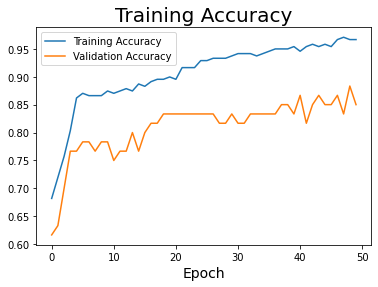

In [139]:
plt.plot(model.history.history["accuracy"], label='Training Accuracy')
plt.plot( model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

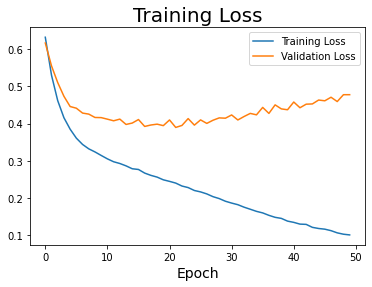

In [140]:
plt.plot( model.history.history['loss'], label='Training Loss')
plt.plot( model.history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.8500


[0.47761985659599304, 0.8500000238418579]

In [142]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
# cf_matrix = confusion_matrix(y_test, y_pred)
y_pred = model.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



Consider rewriting this model with the Functional API.
[[35  2]
 [ 7 16]]


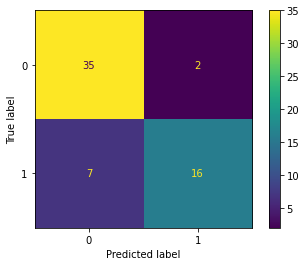

In [143]:
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

predict_prob=model.predict([x_test,y_test])
predict_classes=np.argmax(predict_prob,axis=1)
cm=metrics.confusion_matrix(y_test,predict_classes)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

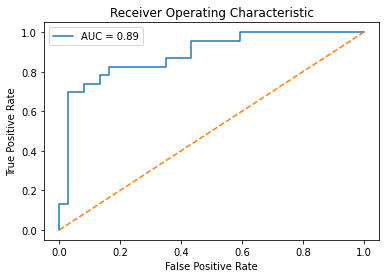

In [200]:
# probabilities = model.predict_proba(x_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = model.predict(x_test)
# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_keras[:,1], pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');